## Day 23 Lecture 1 Assignment

In this assignment, we will explore feature selection and dimensionality reduction techniques. We will use both the FIFA ratings dataset and the Chicago traffic crashes dataset.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
crash_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/traffic_crashes_chicago.csv')
soccer_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv')

In [ ]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22


We will begin with the Chicago traffic crashes dataset, focusing on removing columns with significant missing data.

Remove all columns with more than 5% missing data from the dataframe. (The *missingness summary* function we wrote a few exercises ago will speed this process up significantly.) Print out the columns that were removed, and the proportion of missing data for each column.

In [ ]:
# answer goes here
def null_percentage(df):
  return (df.isnull().sum()*100/df.isnull().count()).round(2)

def missingness_summary(df, print_log=False, sort=None):
  """
  Takes a pandas df and returns a pandas series containing percentage of 
  missing data (null values) in each column.

  Params:
  df : pandas df
  print_log: True or False (default), if true prints out all of the columns and 
            percentages of null values for each column.
  sort : 'ascending', 'descending', None (default), sorts output in ascending or 
          descending if specified.
  """
  missing_values = df.apply(null_percentage)
  
  if sort == 'ascending':
    missing_values = missing_values.sort_values(ascending=True)
  if sort == 'descending':
    missing_values = missing_values.sort_values(ascending=False)

  if print_log:
    print('Printing Missingness Summary')
    for column in missing_values.index:
      print('{} has {} percent missing data'.format(
          column, missing_values[column]
      ))
    print('Missingness Summary completed \n')
  
  return missing_values



In [ ]:
missing_data_report = missingness_summary(crash_data, print_log=True, sort='descending')
missing_data_report

Printing Missingness Summary
WORKERS_PRESENT_I has 99.84 percent missing data
DOORING_I has 99.66 percent missing data
WORK_ZONE_TYPE has 99.44 percent missing data
WORK_ZONE_I has 99.29 percent missing data
PHOTOS_TAKEN_I has 98.73 percent missing data
STATEMENTS_TAKEN_I has 97.98 percent missing data
NOT_RIGHT_OF_WAY_I has 95.39 percent missing data
INTERSECTION_RELATED_I has 77.95 percent missing data
HIT_AND_RUN_I has 72.24 percent missing data
LANE_CNT has 46.71 percent missing data
REPORT_TYPE has 2.3 percent missing data
INJURIES_UNKNOWN has 0.58 percent missing data
MOST_SEVERE_INJURY has 0.58 percent missing data
INJURIES_TOTAL has 0.58 percent missing data
INJURIES_FATAL has 0.58 percent missing data
INJURIES_REPORTED_NOT_EVIDENT has 0.58 percent missing data
INJURIES_NON_INCAPACITATING has 0.58 percent missing data
INJURIES_INCAPACITATING has 0.58 percent missing data
INJURIES_NO_INDICATION has 0.58 percent missing data
NUM_UNITS has 0.38 percent missing data
DEVICE_CONDITIO

WORKERS_PRESENT_I                99.84
DOORING_I                        99.66
WORK_ZONE_TYPE                   99.44
WORK_ZONE_I                      99.29
PHOTOS_TAKEN_I                   98.73
STATEMENTS_TAKEN_I               97.98
NOT_RIGHT_OF_WAY_I               95.39
INTERSECTION_RELATED_I           77.95
HIT_AND_RUN_I                    72.24
LANE_CNT                         46.71
REPORT_TYPE                       2.30
INJURIES_UNKNOWN                  0.58
MOST_SEVERE_INJURY                0.58
INJURIES_TOTAL                    0.58
INJURIES_FATAL                    0.58
INJURIES_REPORTED_NOT_EVIDENT     0.58
INJURIES_NON_INCAPACITATING       0.58
INJURIES_INCAPACITATING           0.58
INJURIES_NO_INDICATION            0.58
NUM_UNITS                         0.38
DEVICE_CONDITION                  0.00
LIGHTING_CONDITION                0.00
FIRST_CRASH_TYPE                  0.00
TRAFFIC_CONTROL_DEVICE            0.00
POSTED_SPEED_LIMIT                0.00
CRASH_DATE               

In [ ]:
crash_data.drop(columns=['WORKERS_PRESENT_I', 'DOORING_I', 'WORK_ZONE_TYPE', 'WORK_ZONE_I', 'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'NOT_RIGHT_OF_WAY_I', 'INTERSECTION_RELATED_I', 'HIT_AND_RUN_I', 'LANE_CNT'], inplace=True)


In [ ]:
crash_data.head()

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN
0,JC334993,7/4/2019 22:33,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,"OVER $1,500",7/4/2019 23:05,FOLLOWING TOO CLOSELY,NOT APPLICABLE,300,N,LAKE SHORE DR SB,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JC370822,7/30/2019 10:22,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,"OVER $1,500",7/30/2019 10:25,FAILING TO YIELD RIGHT-OF-WAY,IMPROPER TURNING/NO SIGNAL,8201,S,DR MARTIN LUTHER KING JR DR,631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JC387098,8/10/2019 17:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,"$501 - $1,500",8/10/2019 17:35,EQUIPMENT - VEHICLE CONDITION,NOT APPLICABLE,6747,S,CREGIER AVE,332.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JC395195,8/16/2019 16:53,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,"$501 - $1,500",8/16/2019 16:53,UNABLE TO DETERMINE,NOT APPLICABLE,554,N,FRANKLIN ST,1831.0,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,JC396604,8/17/2019 16:04,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,"$501 - $1,500",8/17/2019 18:30,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3700,N,WESTERN AVE,1921.0,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Next, we will shift our focus to the FIFA ratings dataset and explore univariate feature selection techniques. We will treat "Overall" as the response and the other ratings as features.

Using the correlations between the response and features, identify the 5 features with the greatest univariate correlation to the response.

In [ ]:
soccer_data.shape

(16122, 32)

In [ ]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22


In [ ]:
fifa = soccer_data.iloc[:, 2:]
fifa.head()

,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,94,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26
1,94,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23
2,92,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33
3,91,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51
4,91,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22


In [ ]:
# answer goes here
fifa_corr = fifa.corr()
print(fifa_corr.shape)
fifa_corr.head()
corr = fifa_corr.iloc[1:,0]
print(corr)


(30, 30)
Crossing           0.496603
Finishing          0.373079
HeadingAccuracy    0.466908
ShortPassing       0.722720
Volleys            0.452090
Dribbling          0.516363
Curve              0.503054
FKAccuracy         0.455875
LongPassing        0.585104
BallControl        0.717933
Acceleration       0.150825
SprintSpeed        0.170155
Agility            0.244344
Reactions          0.847739
Balance            0.059425
ShotPower          0.562960
Jumping            0.228271
Stamina            0.461417
Strength           0.341067
LongShots          0.502109
Aggression         0.452916
Interceptions      0.333275
Positioning        0.438692
Vision             0.524361
Penalties          0.391124
Composure          0.801749
Marking            0.305698
StandingTackle     0.264082
SlidingTackle      0.224365
Name: Overall, dtype: float64


In [ ]:
np.abs(fifa_corr).sort_values(ascending=False).head(5)

Reactions       0.847739
Composure       0.801749
ShortPassing    0.722720
BallControl     0.717933
LongPassing     0.585104
Name: Overall, dtype: float64

Use sklearn's "SelectKBest" function to select the top 5 features using two different scoring metrics: f_regression and mutual_info_regression. Print out the top 5 columns that are selected by both. How do they compare to the ones selected by  univariate correlation?

In [ ]:
# answer goes here

y = fifa['Overall']
x = fifa.drop(columns='Overall')

from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

k = 5
kbest = SelectKBest(k=k, score_func=f_regression)
x_best_features = kbest.fit_transform(x, y)

x_best_features = pd.DataFrame(x_best_features, columns=x.columns[kbest.get_support()])

x_best_features.columns

Index(['ShortPassing', 'LongPassing', 'BallControl', 'Reactions', 'Composure'], dtype='object')

In [ ]:
fifa.shape

(16122, 30)

In [ ]:
kbest = SelectKBest(k=k, score_func=mutual_info_regression)
x_best_features = kbest.fit_transform(x, y)

x_best_features = pd.DataFrame(x_best_features, columns=x.columns[kbest.get_support()])

x_best_features.columns

Index(['ShortPassing', 'Dribbling', 'BallControl', 'Reactions', 'Composure'], dtype='object')

Shifting our focus from feature selection to dimensionality reduction, perform PCA on the ratings provided, excluding "Overall". Then, answer the following questions:

- What percentage of the total variance is capture by the first component? What about the first two, or first three?
- Looking at the components themselves, how would you interpret the first two components in plain English?

In [ ]:
fifa_5 = fifa[x_best_features.columns]
fifa_5.head()

,ShortPassing,LongPassing,Reactions,Aggression,Composure
0,90,87,95,48,96
1,81,77,96,63,95
2,84,78,94,56,94
3,92,91,91,76,88
4,89,83,90,54,91


In [ ]:
# answer goes here

from sklearn.decomposition import PCA

p_best = PCA(n_components=1)
p_best2 = PCA(n_components=2)
p_best3 = PCA(n_components=3)

print(fifa_5.shape)

p_best.fit(fifa_5)
p_best2.fit(fifa_5)
p_best3.fit(fifa_5)

print(p_best.explained_variance_ratio_)
print(p_best2.explained_variance_ratio_)
print(p_best3.explained_variance_ratio_)

(16122, 5)
[0.61197997]
[0.61197997 0.23183799]
[0.61197997 0.23183799 0.09745117]


In [ ]:
components = p_best.fit_transform(fifa_5) 
components.shape

(16122, 1)

The first two components capture 88% of the possible variability. This means that our model should be able to explain 88% of the change in value in the dataset.

In [ ]:
print(p_best2)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [ ]:
print(p_best2.components_)

[[ 0.41668889  0.52529541  0.34919239  0.51154597  0.40843664]
 [ 0.33467037  0.37779266  0.06921807 -0.84354885  0.1700078 ]]


In [ ]:
import statsmodels.api as sm

In [ ]:
results = sm.OLS(y, components).fit()

In [ ]:
import seaborn as sns

In [ ]:
print(components[0])
print(y[0])

[47.71784048]
94


In [ ]:
x2 = [ i[0] for i in components ] 

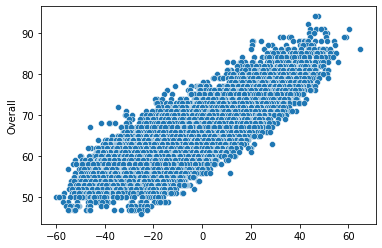

In [ ]:
sns.scatterplot(x=x2, y=y)

In [ ]:
y.shape

(16122,)

In [ ]:
p_best2.components_.shape

(2, 5)

In [ ]:
print(x)

                 Crossing  Finishing  ...  StandingTackle  SlidingTackle
Overall          0.496603   0.373079  ...        0.264082       0.224365
Crossing         1.000000   0.413404  ...        0.085429       0.078963
Finishing        0.413404   1.000000  ...       -0.558565      -0.585841
HeadingAccuracy -0.134959   0.002099  ...        0.257420       0.234933
ShortPassing     0.632386   0.398895  ...        0.235083       0.203009
Volleys          0.472485   0.814663  ...       -0.402222      -0.430056
Dribbling        0.712261   0.706635  ...       -0.244737      -0.258046
Curve            0.714762   0.614189  ...       -0.128246      -0.147523
FKAccuracy       0.618580   0.537508  ...       -0.056328      -0.081250
LongPassing      0.592781   0.218965  ...        0.384637       0.360727
BallControl      0.682796   0.645849  ...       -0.067358      -0.095753
Acceleration     0.439799   0.373630  ...       -0.295243      -0.276393
SprintSpeed      0.393403   0.349087  ...       -0.